# Exploratory Data Analysis - Online News Popularity 

In [30]:
import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#### Reading data

In [48]:
#[kannan: directly reading the data, later change the pipeline to preprocessed, feature engineered data]
inputFile = 'OnlineNewsPopularity.csv' 
df = read_csv(inputFile)
df.columns = df.columns.str.replace(' ','')
df.head()

,Id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,1,http://mashable.com/2014/09/01/americans-held-...,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1,1100
1,2,http://mashable.com/2014/09/01/apple-visa-mast...,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0,1100
2,3,http://mashable.com/2014/09/01/aussie-football...,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,5,0,0,0,0,0,1,1000
3,4,http://mashable.com/2014/09/01/australia-gover...,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,9,0,0,0,0,0,1,822
4,5,http://mashable.com/2014/09/01/australia-jane-...,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,9,0,0,0,0,0,1,841


In [49]:
# Dropping useless attributes
df.drop('url', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

In [ ]:
# variables for total columns, total input attributes, target column index and renaming target variable
totCol = len(df.columns)
totAttr = totCol-1
targetCol = totCol #last column
df.rename(columns={'shares': 'targetVar'}, inplace=True)

In [33]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

### Descriptive statistics

In [34]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1,1100
1,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0,1100
2,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,5,0,0,0,0,0,1,1000
3,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,9,0,0,0,0,0,1,822
4,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,9,0,0,0,0,0,1,841


In [35]:
#Shape
df.shape

(7795, 18)

In [36]:
#Data types
df.dtypes

n_tokens_title                     int64
n_tokens_content                   int64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
shares                             int64
dtype: object

In [37]:
#Statistical summary
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
count,7795.000000,7795.000000,7795.000000,7795.00000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000
mean,11.134830,552.592303,0.482269,0.90789,0.621471,9.934573,2.717383,3.769596,1.199615,4.264341,6.948428,0.035792,0.197049,0.121360,0.026555,0.139705,0.319179,3028.541629
std,2.174198,467.271242,0.176853,0.28920,0.216238,11.621758,3.398486,6.857808,3.731758,1.386453,1.869191,0.185784,0.397795,0.326566,0.160791,0.346703,0.466188,8195.667753
min,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,10.000000,255.000000,0.447916,1.00000,0.609358,3.000000,1.000000,1.000000,0.000000,4.429090,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.500000
50%,11.000000,434.000000,0.516049,1.00000,0.673184,7.000000,2.000000,1.000000,0.000000,4.661270,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
75%,13.000000,752.500000,0.582146,1.00000,0.733208,13.000000,4.000000,3.000000,1.000000,4.862137,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2400.000000
max,23.000000,7002.000000,1.000000,1.00000,1.000000,304.000000,116.000000,100.000000,50.000000,8.041534,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,284700.000000


In [38]:
#Missing values
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
shares                           0
dtype: int64

### Data visualizations

##### Univariate plots

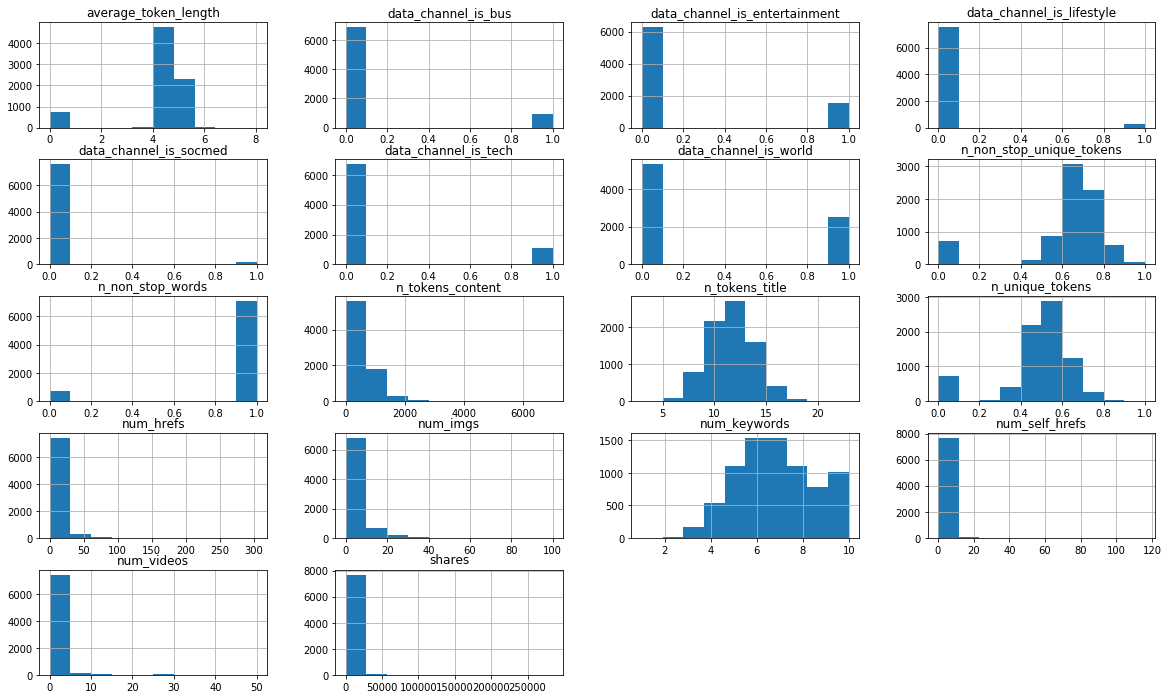

In [39]:
# Histograms for each attribute
df.hist()
pyplot.show()

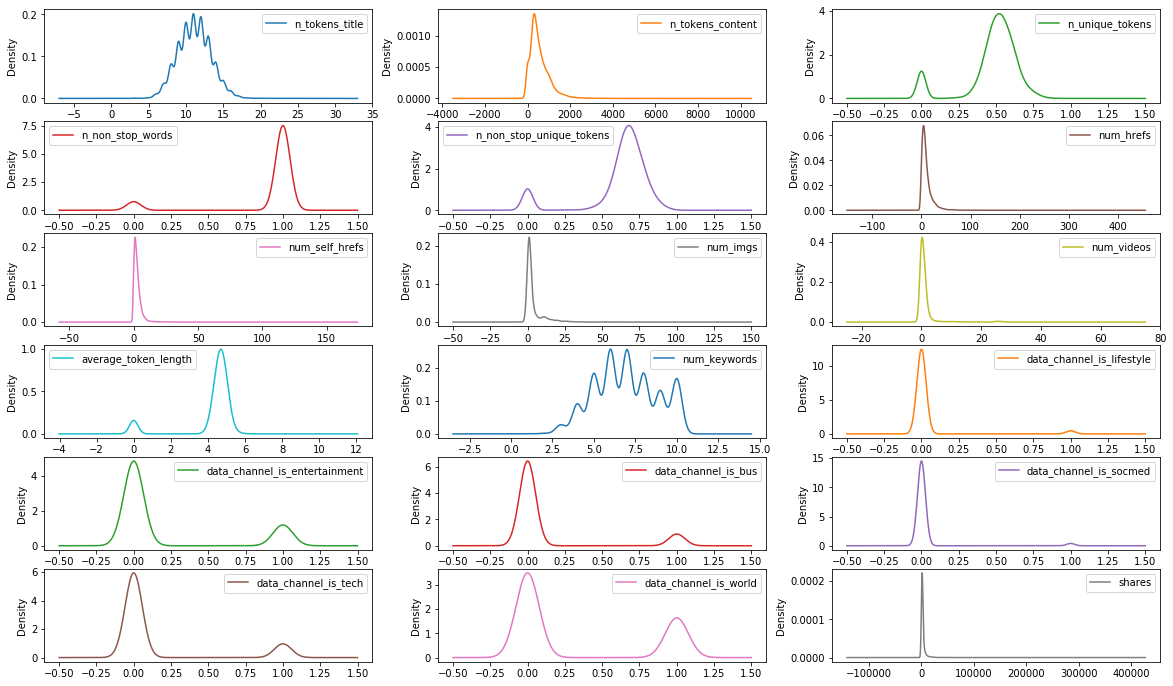

In [40]:
# Density plot for each attribute
df.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

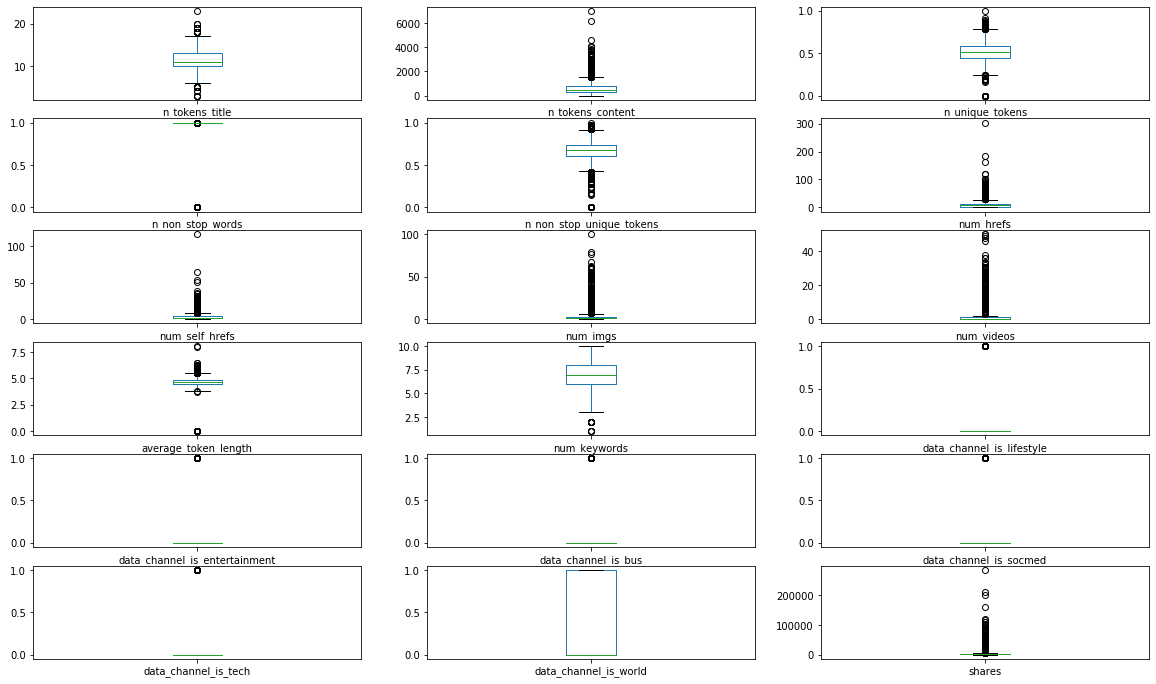

In [41]:
# Box and Whisker plot for each attribute
df.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

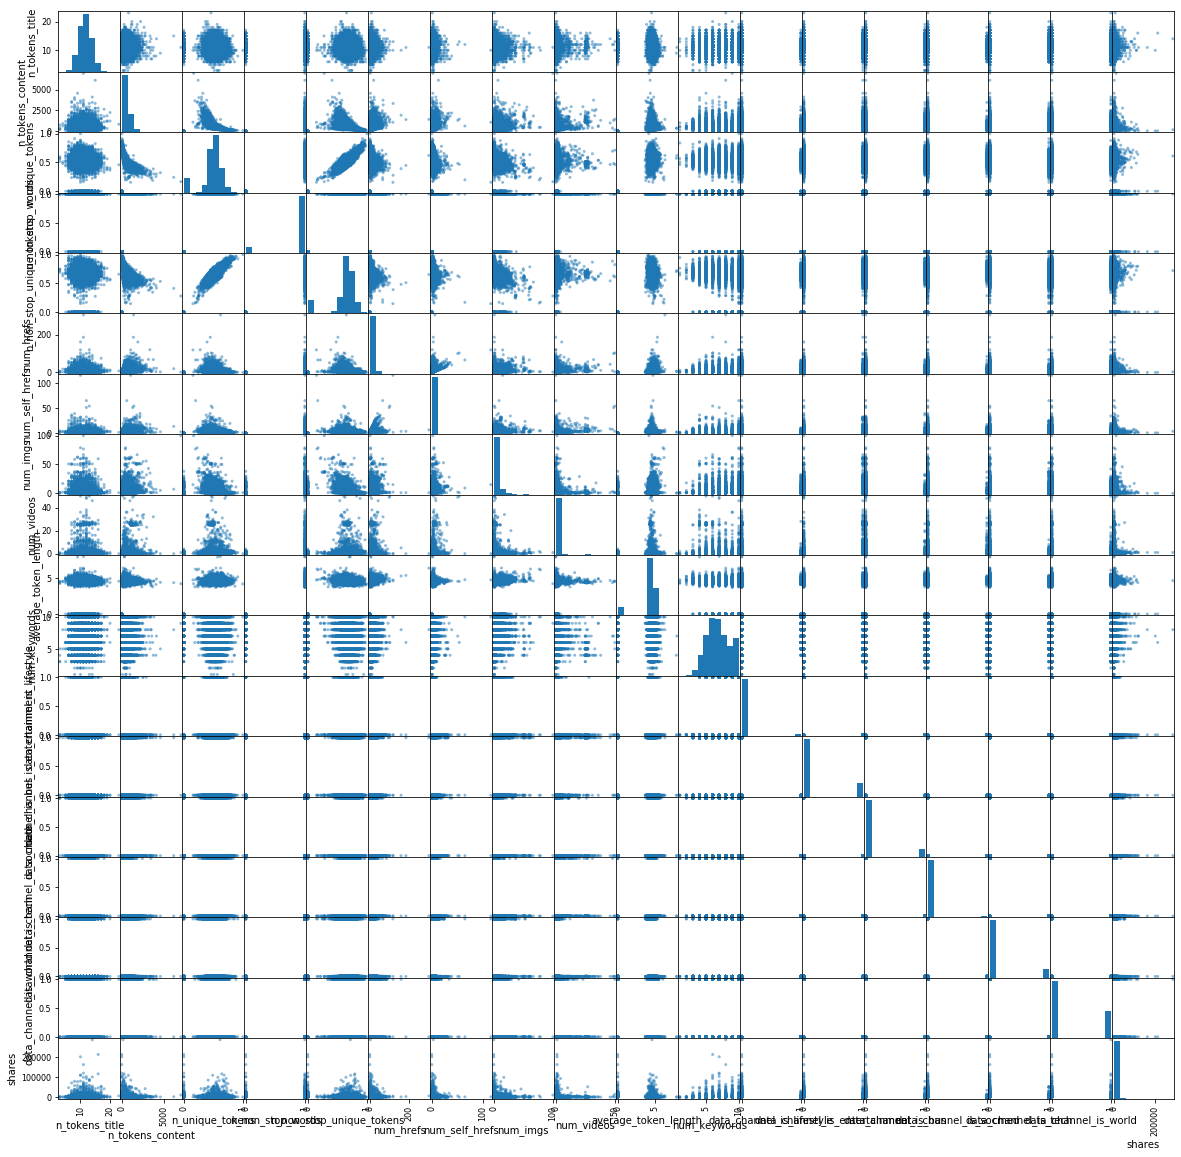

In [42]:
# Scatterplot matrix
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
pyplot.rcParams["figure.figsize"] = fig_size

scatter_matrix(df)
pyplot.show()

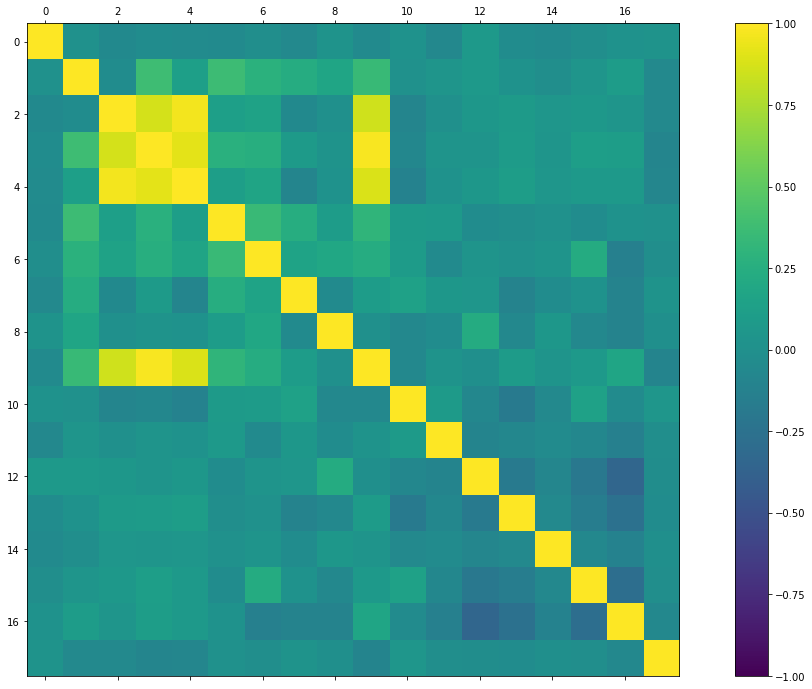

In [54]:
# Correlation matrix
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

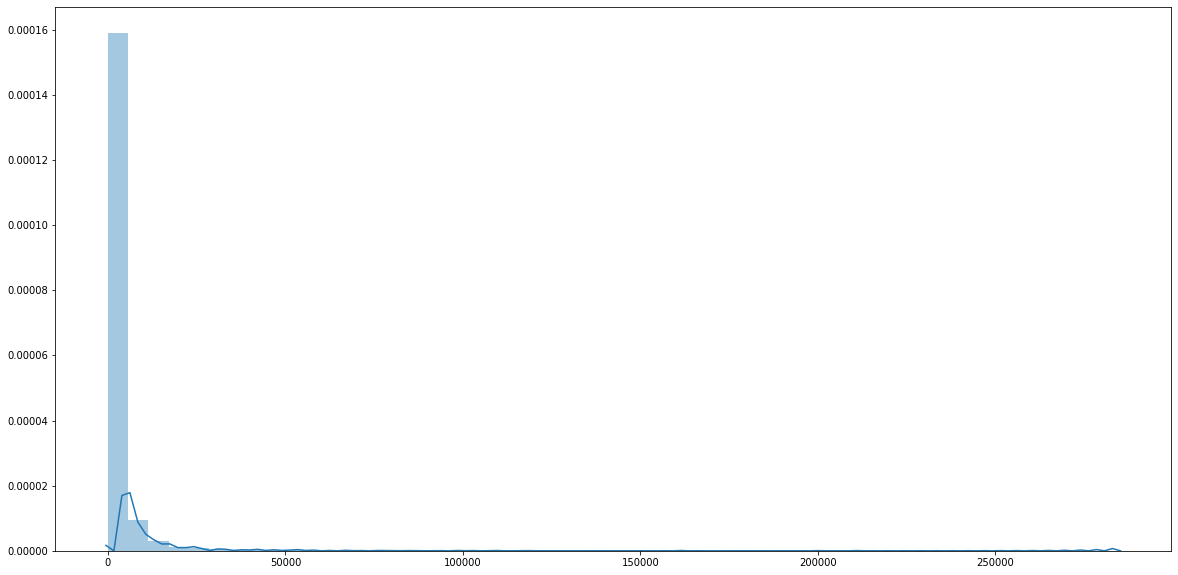

In [55]:
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
pyplot.rcParams["figure.figsize"] = fig_size

import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
ax = sns.distplot(df[['shares']])
plt.show()

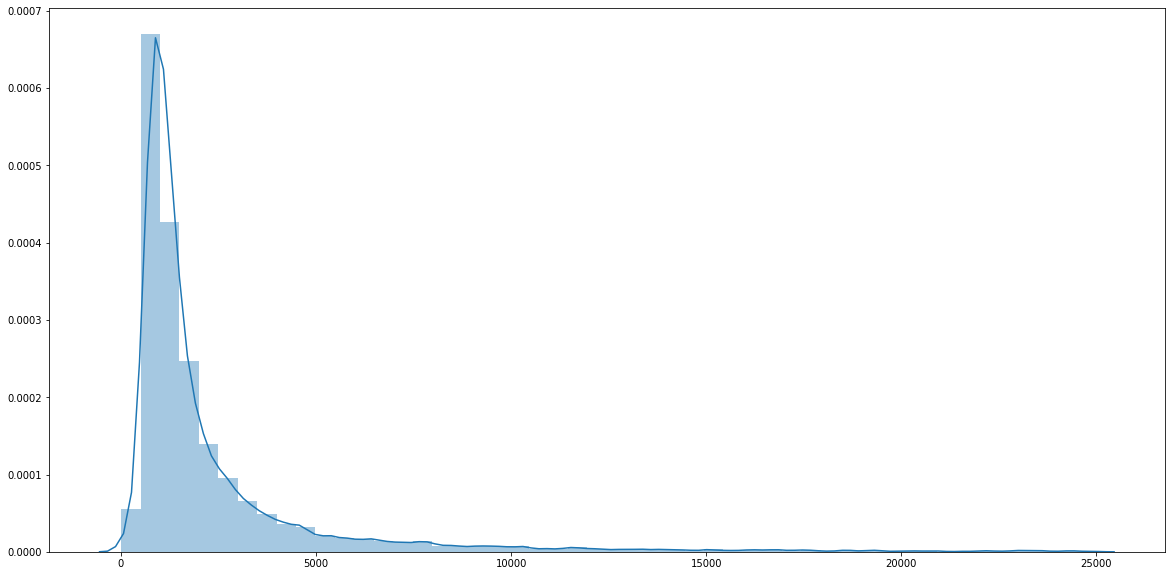

In [56]:
ax = sns.distplot(df[df.shares<25000][['shares']])
plt.show() #99%